Author: Justin Short 

This notebook contains some code I used to initially analyze the dataset. I was trying many thing and may have broken the code in a place or two, but this notebook still generally shows what I tried and what I found out while visualizing data and testing models.

Discoveries:
- large number of 460 mph values, may have been a missing value replacement or a faulty data collection tool
- removing outliers can provide minor imporvements
- data points appear to all come from a similar location (lat, long)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Path To The Dataset

# Load the dataset
df = pd.read_csv('data/aircraft-data_nov_dec.csv')
SELECT = ['alt', 'mph']

filtered = pd.DataFrame(df, columns=SELECT)

# Print the first few rows of the data
df.head(1000)

,flight,tail_number,long,lat,alt,manufacturer,model,reg_expiration,reg_owner,reg_city,reg_state,squawk,mph,spotted
0,SIS300,N300NJ,-118.213,34.5823,20175,BOMBARDIER INC,BD-100-1A10,1/31/24,PUNTA PACIFICO I LLC,BAKERSFIELD,CALIFORNIA,1077.0,474,11/7/22 13:30
1,UAL1434,N67501,-117.937,34.6038,36700,BOEING,737-9,4/30/24,UNITED AIRLINES INC,CHICAGO,ILLINOIS,7730.0,523,11/7/22 13:30
2,SWA3287,N483WN,-118.035,34.6345,13225,BOEING,737-7H4,8/31/24,SOUTHWEST AIRLINES CO,DALLAS,TEXAS,4770.0,380,11/7/22 13:30
3,AAL2059,N660AW,-118.075,34.4643,33750,AIRBUS INDUSTRIE,A320-232,2/29/24,US BANK NA TRUSTEE,BOSTON,MASSACHUSETTS,1751.0,527,11/7/22 13:30
4,N84PJ,N84PJ,-117.756,34.6002,34725,DASSAULT,FALCON 2000EX,12/31/24,HAMPTON AIRWAYS INC,SELLERSBURG,INDIANA,6054.0,525,11/7/22 13:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PAT103,N10000J,-118.420,34.4712,18550,NaN,NaN,NaN,NaN,NaN,NaN,5731.0,246,11/9/22 14:50
996,REY13,N10024P,-117.807,34.4571,22325,NaN,NaN,NaN,NaN,NaN,NaN,4763.0,308,11/9/22 14:50
997,N905SA,N905SA,-118.347,34.5680,61625,BOMBARDIER INC,CL-600-2B16(CL-604),9/30/23,SIERRA AVIATION INC,KANSAS CITY,MISSOURI,1755.0,320,11/9/22 14:50
998,LXJ582,N582FX,-118.717,34.4866,22825,BOMBARDIER INC,BD-100-1A10,1/31/25,FLEXJET LLC,CLEVELAND,OHIO,7220.0,444,11/9/22 15:00


In [4]:
df.shape

(30947, 14)

In [82]:
# Find common factor behind 460 mph flights
wierd = df[df['mph'] == 460]
wierd.head(1000)

,flight,tail_number,long,lat,alt,manufacturer,model,reg_expiration,reg_owner,reg_city,reg_state,squawk,mph,spotted
7,N94HL,N94HL,-117.763,34.5673,26125,CESSNA,525,4/30/25,CAE OXFORD AVIATION ACADEMY PHOENIX INC,MESA,ARIZONA,1541.0,460,11/7/22 13:50
8,ATN3464,N347AZ,-117.956,34.5818,18675,BOEING,767-319,10/31/25,CARGO AIRCRAFT MANAGEMENT INC,WILMINGTON,OHIO,6663.0,460,11/7/22 13:50
9,JSX1O7,N258JX,-118.121,34.6135,8275,EMBRAER,EMB-135LR,6/30/25,DELUX PUBLIC CHARTER LLC,DALLAS,TEXAS,4624.0,460,11/7/22 14:00
10,FENIX45,N545PA,-117.961,34.6441,13825,GATES LEAR JET,36A,1/31/24,PHOENIX AIR GROUP INC,CARTERSVILLE,GEORGIA,4125.0,460,11/7/22 14:00
12,N33FW,N33FW,-117.789,34.5623,24500,CESSNA,525,3/31/23,GOLD COAST LEASING LLC,SANTA MARIA,CALIFORNIA,4761.0,460,11/7/22 14:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,N427WA,N427WA,-118.205,34.7947,14650,PILATUS,PC-12/45,1/31/26,IM DA BES LLC,SAN LUIS OBISPO,CALIFORNIA,2021.0,460,11/13/22 14:10
2971,GAJ871,N871UP,-118.283,34.4152,23425,TEXTRON AVIATION INC,B300,6/30/25,WHEELS UP PARTNERS LLC,NEW YORK,NEW YORK,5362.0,460,11/13/22 14:20
2976,EJM100,N100HG,-118.486,34.5421,45775,GULFSTREAM AEROSPACE,G-V,8/31/24,HARBOUR GROUP INDUSTRIES INC,CLAYTON,MISSOURI,2336.0,460,11/13/22 14:30
2981,N909PM,N909PM,-118.633,34.7926,38700,DASSAULT AVIATION,FALCON 900B,5/31/24,MASON AVIATION LLC,ABERDEEN,WASHINGTON,7305.0,460,11/13/22 14:40


In [ ]:
# remove all rows where mph is 460
filtered = filtered[filtered.mph != 460]
filtered['mph'].describe()

,alt,mph
7,26125,460
8,18675,460
9,8275,460
10,13825,460
12,24500,460


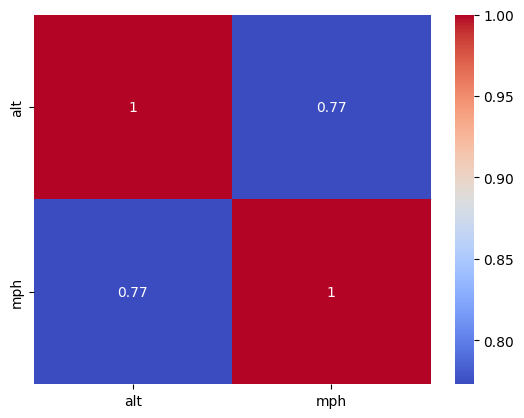

In [71]:
# Verify correlation with a heatmap
corr = filtered.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [72]:
# Split data into dependent and independent variables
X = filtered['alt']
y = filtered['mph']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Print the number of training and testing samples
print('Number of training samples:', len(X_train))
print('Number of testing samples:', len(X_test))

# Normalize the data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train.to_frame())
X_test_norm = scaler.transform(X_test.to_frame())

Number of training samples: 16663
Number of testing samples: 4166


Mean Squared Error: 2485.0561811329612
R2 Score: 0.5949358773188282


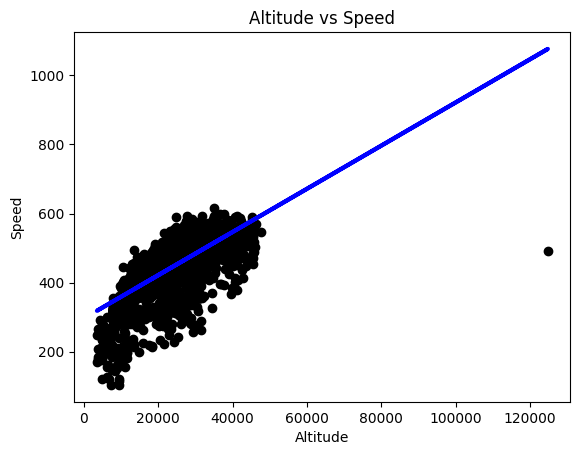

In [73]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_norm, y_train)

# Make predictions
y_pred = model.predict(X_test_norm)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

# Plot the data
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Altitude')
plt.ylabel('Speed')
plt.title('Altitude vs Speed')
plt.show()

In [75]:
# Repeat the process but only use inner quartile range
Q1 = filtered.quantile(0.25)
Q3 = filtered.quantile(0.75)
IQR = Q3 - Q1
filtered_iqr = filtered[~((filtered < (Q1 - 1.5 * IQR)) | (filtered > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print number of rows removed
print('Number of rows removed:', len(filtered) - len(filtered_iqr))

Number of rows removed: 1193


Mean Squared Error (IQR): 1398.6038548092993
R2 Score (IQR): 0.5905712166026998


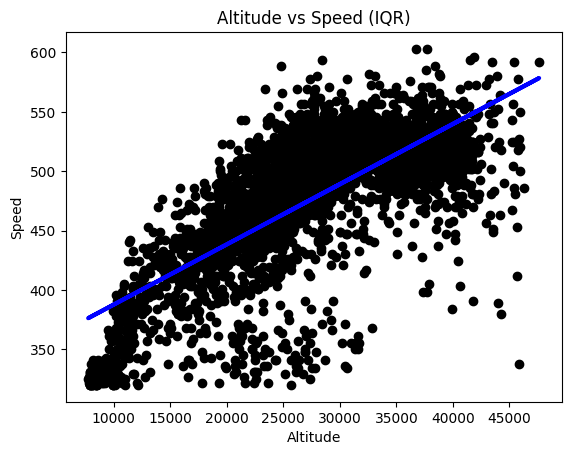

In [ ]:
# Split data into dependent and independent variables
X2 = filtered_iqr['alt']
y2 = filtered_iqr['mph']    

# Split data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

# Normalize the data
scaler2 = StandardScaler()
X_train_norm2 = scaler2.fit_transform(X_train2.to_frame())
X_test_norm2 = scaler2.transform(X_test2.to_frame())

# Create a linear regression model
model2 = LinearRegression()

# Train the model
model2.fit(X_train_norm2, y_train2)

# Make predictions
y_pred2 = model2.predict(X_test_norm2)

# Calculate the mean squared error
mse2 = mean_squared_error(y_test2, y_pred2)
print('Mean Squared Error (IQR):', mse2)

# Calculate the R2 score
r2_2 = r2_score(y_test2, y_pred2)
print('R2 Score (IQR):', r2_2)

# Plot the data
plt.scatter(X_test2, y_test2, color='black')
plt.plot(X_test2, y_pred2, color='blue', linewidth=3)
plt.xlabel('Altitude')
plt.ylabel('Speed')
plt.title('Altitude vs Speed (IQR)')
plt.show()

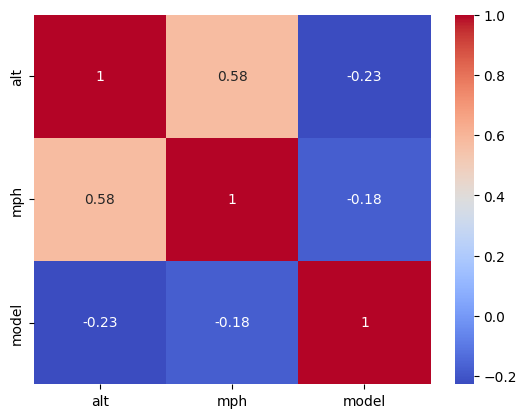

In [47]:
# Repeat Using Manufacterer and Model as an Additional Features
SELECT = ['alt', 'mph', 'model']

filtered = pd.DataFrame(df, columns=SELECT)

# discretize the manufacturer and model columns
filtered['model'] = pd.Categorical(filtered['model'])
filtered['model'] = filtered['model'].cat.codes

# Verify correlation with a heatmap
corr = filtered.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [60]:
# Select the features and target
feat = ['alt', 'model', 'mph']
df_feat = pd.DataFrame(df, columns=feat)

cols = ['alt', 'mph']
# Remove outliers using IQR
Q1 = df_feat[cols].quantile(0.25)
Q3 = df_feat[cols].quantile(0.75)
IQR = Q3 - Q1

df_feat = df_feat[~((df_feat[cols] < (Q1 - 1.5 * IQR)) |(df_feat[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_feat.dropna(inplace=True)
df_feat['model'] = pd.Categorical(df_feat['model'])
df_feat['model'] = df_feat['model'].cat.codes

Mean Squared Error (Model): 859.4889028416422
R2 Score (Model): 0.35081261455907586


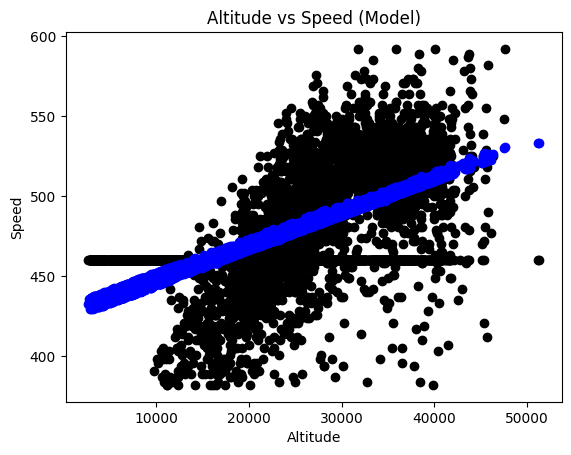

In [63]:
# Split data into dependent and independent variables
X3 = df_feat[['alt', 'model']]
y3 = df_feat['mph']

# Split data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2)

# Normalize the data
scaler3 = StandardScaler()
X_train_norm3 = scaler3.fit_transform(X_train3)
X_test_norm3 = scaler3.transform(X_test3)

# Create a linear regression model
model3 = LinearRegression()

# Train the model
model3.fit(X_train_norm3, y_train3)

# Make predictions
y_pred3 = model3.predict(X_test_norm3)

# Calculate the mean squared error
mse3 = mean_squared_error(y_test3, y_pred3)
print('Mean Squared Error (Model):', mse3)

# Calculate the R2 score
r2_3 = r2_score(y_test3, y_pred3)
print('R2 Score (Model):', r2_3)

# Plot the data
plt.scatter(X_test3['alt'], y_test3, color='black')
plt.scatter(X_test3['alt'], y_pred3, color='blue')
plt.xlabel('Altitude')
plt.ylabel('Speed')
plt.title('Altitude vs Speed (Model)')
plt.show()